In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Encuesta Nacional de Ocupación y Empleo (ENOE) => Estructura de la tabla de datos del sociodemográfico



- Campo 24 (SEX): 1 = Hombre y 2= Mujer
- Campo 25 (EDA): Edad, revisar invalidos en la tabla (00, 97-99)
- Campo 31 (CS_P13_1): Nivel de estudios (no años de estudio, revisar tabla)
- Campo 33 (CCS_P14_C): Interesante para conocer las mas estudiadas, de forma segmentada

- Campo 81


In [2]:
DB = pd.read_csv("ENOE_SDEMT123.csv", sep=",", encoding="latin-1")

C:\Users\lfvvi\AppData\Local\Temp\ipykernel_21084\92391124.py:1: DtypeWarning: Columns (2,5,8,22,23,24,25,26,27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  DB = pd.read_csv("ENOE_SDEMT123.csv", sep=",", encoding="latin-1")


In [3]:
DB.size
Y_dim, X_dim = DB.shape

In [4]:
salario_p_mujer = round(DB[ (DB['ingocup'] > 0) & (DB['sex'] == 2) ]['ingocup'].mean(),2)
salario_p_mujer_count = DB[ (DB['ingocup'] > 0) & (DB['sex'] == 2) ]['ingocup'].count()
salario_p_hombre = round(DB[ (DB['ingocup'] > 0) & (DB['sex'] == 1) ]['ingocup'].mean(),2)
salario_p_hombre_count = DB[ (DB['ingocup'] > 0) & (DB['sex'] == 1) ]['ingocup'].count()


print(f'El salario de los hombre es ${salario_p_hombre}, el de las mujeres es ${salario_p_mujer}, por lo que un hombre gana el promedio mas {round(salario_p_hombre - salario_p_mujer,2)}')

print(f"La proporción de hombres es de {round(salario_p_hombre_count/(salario_p_hombre_count+salario_p_mujer_count)*100,2)}% vs {round(salario_p_mujer_count/(salario_p_hombre_count+salario_p_mujer_count)*100,2)}% ")

El salario de los hombre es $9849.21, el de las mujeres es $7546.17, por lo que un hombre gana el promedio mas 2303.04
La proporción de hombres es de 58.31% vs 41.69% 


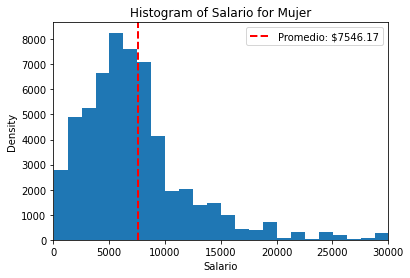

In [5]:
# Calculate the mean value of the data
mean_salario = np.mean(salario_p_mujer)

# Create the histogram with a specified number of bins and normalized density
plt.hist(DB[ (DB['ingocup'] > 0) & (DB['sex'] == 2) ]['ingocup'], bins=200)

# Set the X-axis range (adjust the limits as per your desired range)
plt.xlim(0, 30000)  # Replace 0 and 100000 with your desired lower and upper limits

# Add a vertical line at the mean value
plt.axvline(mean_salario, color='red', linestyle='dashed', linewidth=2, label=f'Promedio: ${mean_salario}')

# Add labels and a title to the plot (optional but recommended)
plt.xlabel('Salario')
plt.ylabel('Density')
plt.title('Histogram of Salario for Mujer')

# Add a legend to the plot to display the label 'Mean' for the vertical line
plt.legend()

# Display the plot
plt.show()
